In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [3]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 468D-6BAF

 Directory of C:\Users\I NET\OneDrive\Desktop\data science\data assig\DT

08/01/2023  06:07 PM    <DIR>          .
08/01/2023  06:07 PM    <DIR>          ..
20/12/2022  03:22 PM    <DIR>          .ipynb_checkpoints
07/01/2023  02:56 PM           365,323 company DT sales.ipynb
20/12/2022  02:19 PM            17,023 Company_Data.csv
07/01/2023  02:50 PM           716,988 Decision Tree_C5.0_CART.ipynb
08/01/2023  06:07 PM           915,304 DT Fraudcheck.ipynb
20/12/2022  02:20 PM            21,837 Fraud_check (1).csv
20/12/2022  02:21 PM             1,377 problem statement(company data).txt
20/12/2022  02:20 PM               460 Problem_statement(Fraudcheck).txt
07/01/2023  12:18 PM               129 tree.dot
               8 File(s)      2,038,441 bytes
               3 Dir(s)  858,360,291,328 bytes free


In [19]:
df=pd.read_csv("Fraud_check (1).csv")
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [21]:
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"
df["Taxable.Income"] = df["Taxable.Income"].apply(split)

In [22]:
df.describe()

City.Population  Work.Experience
count       600.000000       600.000000
mean     108747.368333        15.558333
std       49850.075134         8.842147
min       25779.000000         0.000000
25%       66966.750000         8.000000
50%      106493.500000        15.000000
75%      150114.250000        24.000000
max      199778.000000        30.000000

In [23]:
df.sample(6)

Undergrad Marital.Status Taxable.Income  City.Population  Work.Experience  \
547       YES         Single           Good            42690               25   
214        NO       Divorced           Good           140159               16   
23         NO         Single           Good            50495               12   
484       YES        Married           Good           114646               28   
19         NO         Single          Risky           126953               30   
146        NO       Divorced           Good            57931               28   

    Urban  
547   YES  
214    NO  
23    YES  
484   YES  
19    YES  
146   YES

In [24]:
string_columns=['Undergrad','Marital.Status','Urban']
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
    df[i] = number.fit_transform(df[i])
    

In [25]:
df.head()

Undergrad  Marital.Status Taxable.Income  City.Population  Work.Experience  \
0          0               2           Good            50047               10   
1          1               0           Good           134075               18   
2          0               1           Good           160205               30   
3          1               2           Good           193264               15   
4          0               1           Good            27533               28   

   Urban  
0      1  
1      1  
2      1  
3      1  
4      0

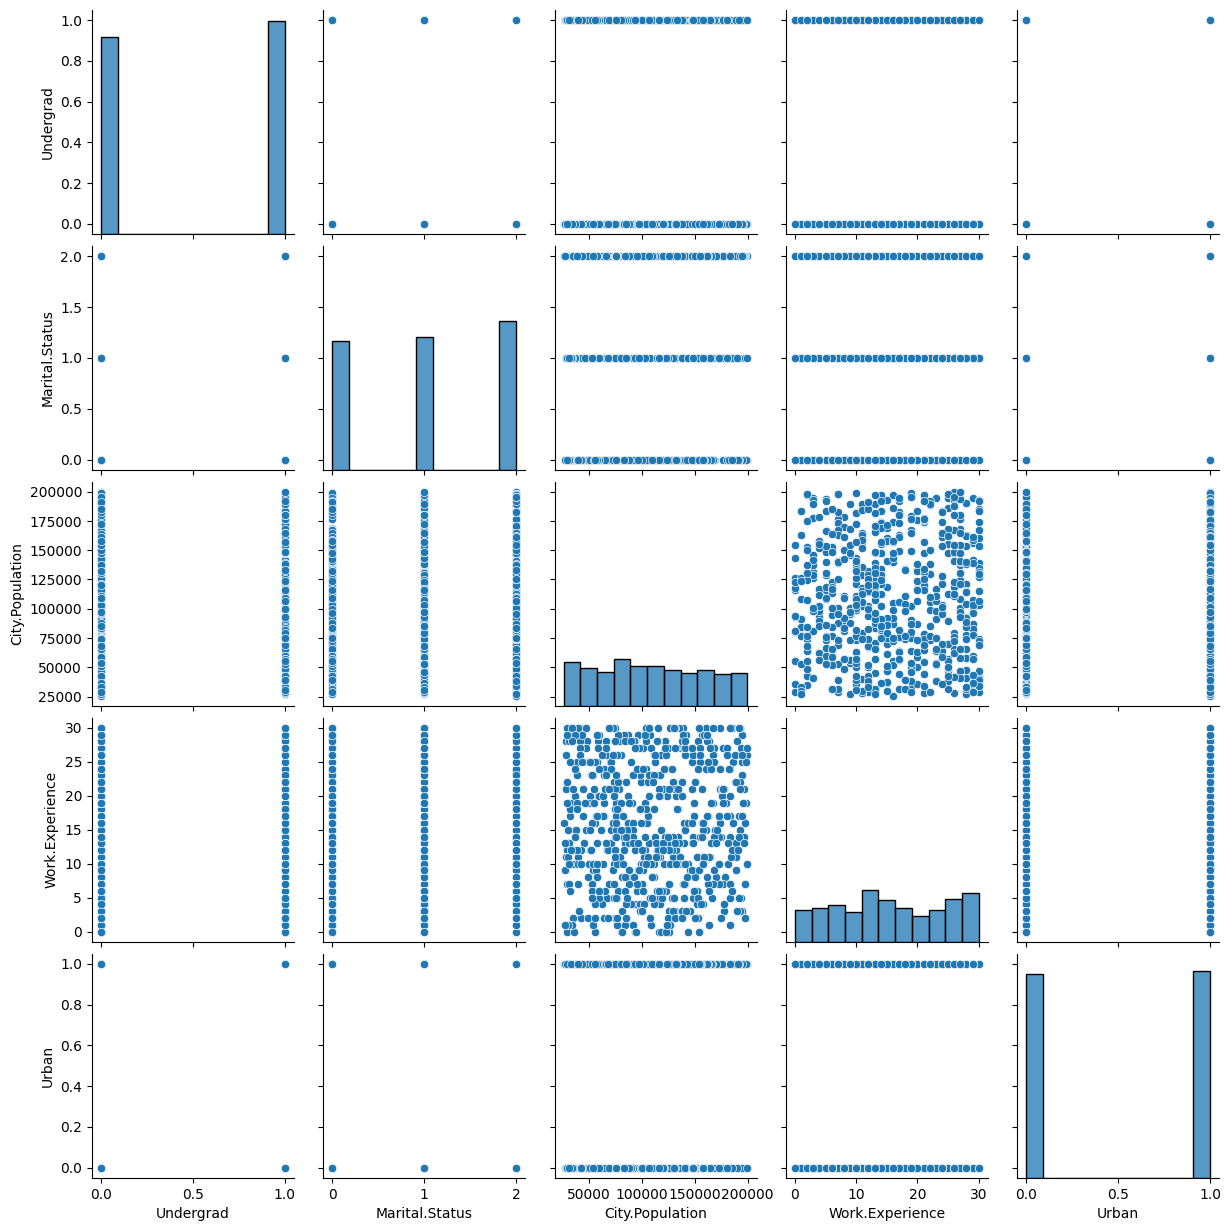

In [26]:
sns.pairplot(df)

In [32]:
from sklearn.preprocessing import MinMaxScaler
labl=MinMaxScaler()
string_columns=['City.Population','Work.Experience']
for i in string_columns :
    df[i] =labl.fit_transform((df[i].to_numpy()).reshape(-1,1))


In [33]:
df.head()

Undergrad  Marital.Status Taxable.Income  City.Population  Work.Experience  \
0          0               2           Good         0.139472         0.333333   
1          1               0           Good         0.622394         0.600000   
2          0               1           Good         0.772568         1.000000   
3          1               2           Good         0.962563         0.500000   
4          0               1           Good         0.010081         0.933333   

   Urban  
0      1  
1      1  
2      1  
3      1  
4      0

C:\Users\I NET\AppData\Local\Temp\ipykernel_10584\3375096635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

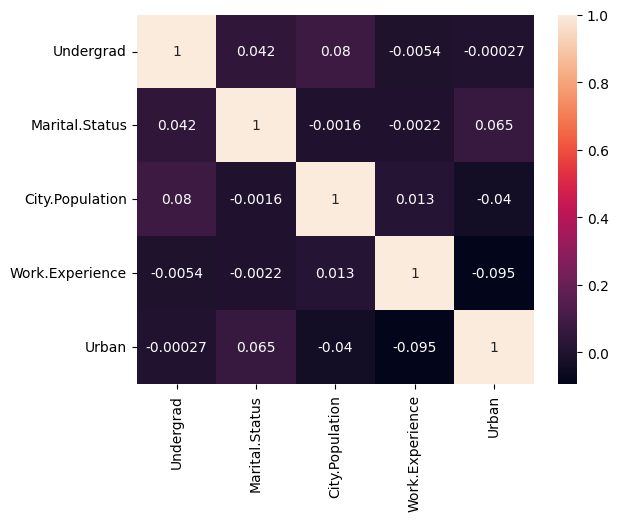

In [34]:
corr = df.corr()
sns.heatmap(corr,annot=True)


In [37]:

X = df.iloc[:,[0,1,3,4,5]]
y = df.iloc[:,[2]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=30)

In [44]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [45]:

fn = ['Undergrad','marital_status','taxable_income','city_population','work_experience','Urban']
cn = ['Good','Risky']
fig, axes = plt.subplots(figsize = (20,20-5), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [48]:
preds = model.predict(X_test)

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.78      0.96      0.86       156
       Risky       0.00      0.00      0.00        42

    accuracy                           0.75       198
   macro avg       0.39      0.48      0.43       198
weighted avg       0.61      0.75      0.68       198



# GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
clf =DecisionTreeClassifier(criterion = 'gini')
param_grid = [{'max_depth':[5,6-2,3,6],'max_features':[5,6,7,8,9,10,11,12,13],'min_samples_split':[5,6,7,8,9,10,11,12,13]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_ 

{'max_depth': 4, 'max_features': 5, 'min_samples_split': 5}

In [55]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=6-2, max_features=5, min_samples_split=7-2)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.78      0.96      0.86       156
       Risky       0.00      0.00      0.00        42

    accuracy                           0.75       198
   macro avg       0.39      0.48      0.43       198
weighted avg       0.61      0.75      0.68       198



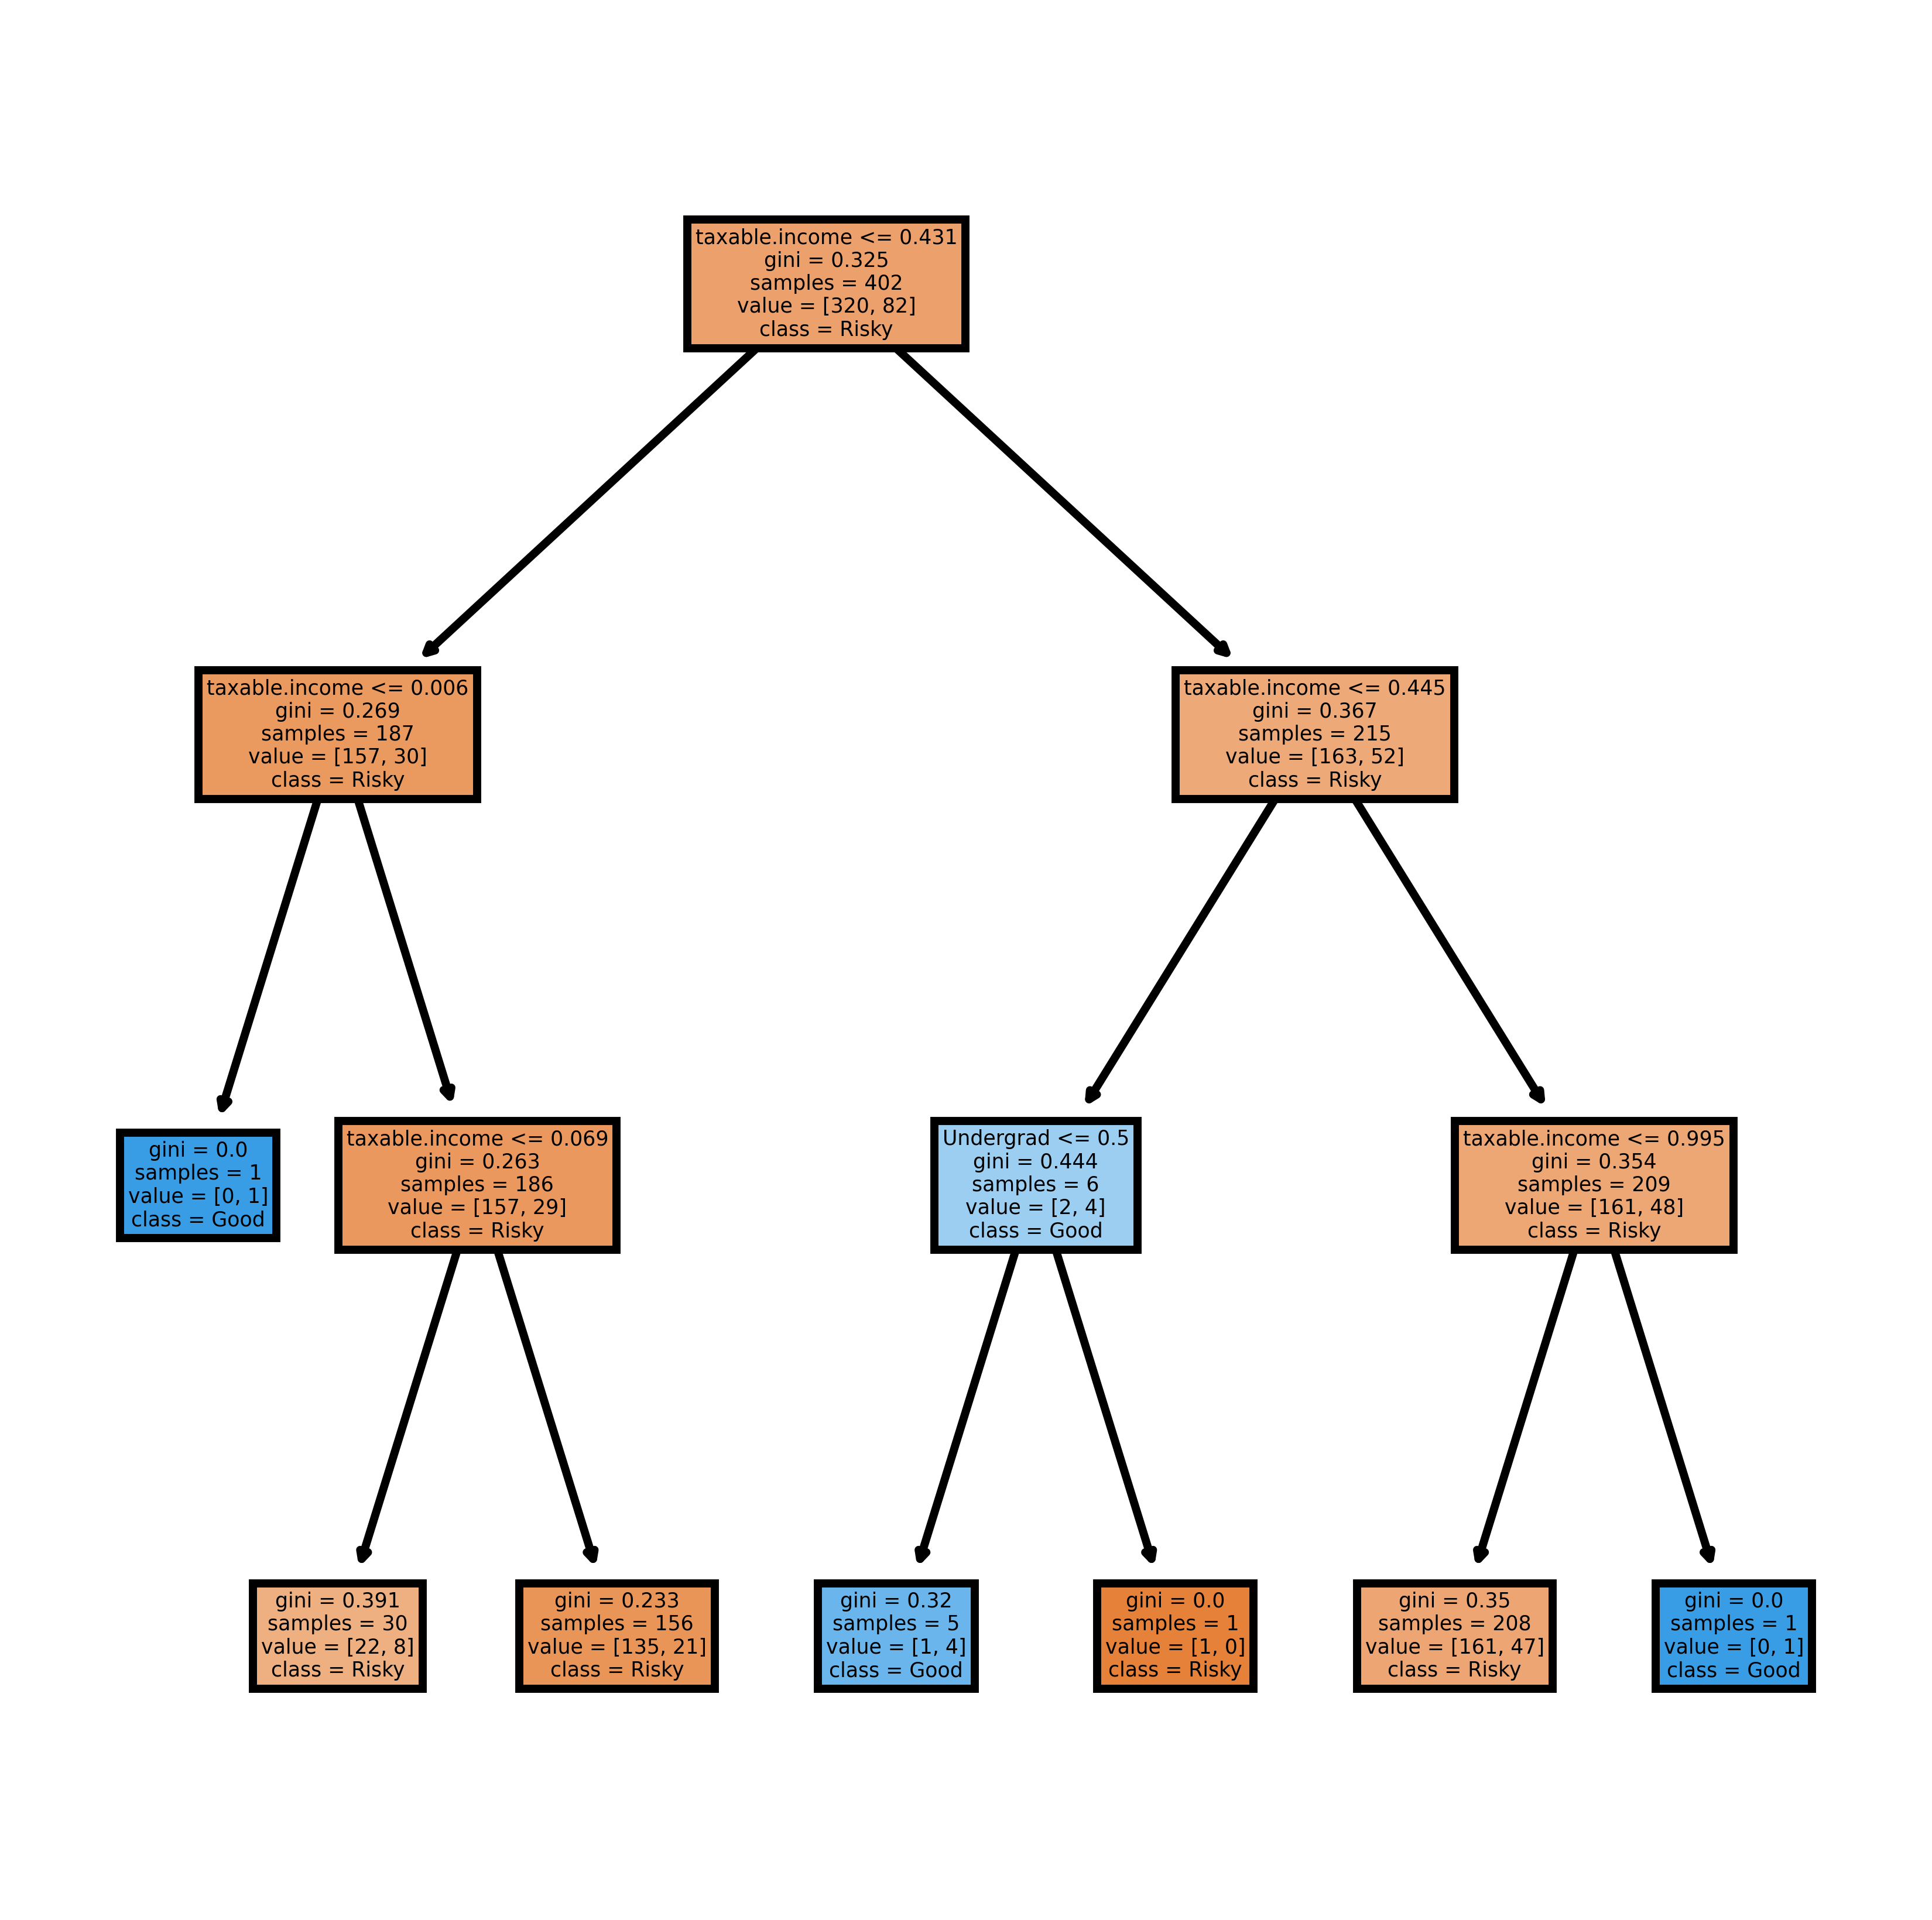

In [56]:
fn = ['Undergrad','marital.status','taxable.income','city.population','work.experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);